In [668]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from numpy import random
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px # data visualization

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
import statsmodels.api as sm

# %config InlineBackend.figure_formats =['retina']  # or svg
%matplotlib inline


In [833]:
df_rent = pd.read_csv('lisbon_rent_1267.csv')

In [834]:
df_rent.head()

,Price,Address,Prop_type,Size,Bath,Bed
0,950 € / Monthly,"Lisboa - Amadora, Venteira",Condo/Apartment,115 m2,2,3
1,750 € / Monthly,"Lisboa - Lisboa, Belém",Condo/Apartment,40 m2,1,1
2,1 000 € / Monthly,"Lisboa - Lisboa, Lumiar",Condo/Apartment,73 m2,1,1
3,750 € / Monthly,"Lisboa - Lisboa, Penha de França",Condo/Apartment,48 m2,1,2
4,1 150 € / Monthly,"Lisboa - Oeiras, Oeiras e São Julião da Bar...",Condo/Apartment,90 m2,2,3


In [835]:
df_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1268 non-null   object
 1   Address    1268 non-null   object
 2   Prop_type  1268 non-null   object
 3   Size       1268 non-null   object
 4   Bath       1268 non-null   object
 5   Bed        1268 non-null   object
dtypes: object(6)
memory usage: 59.6+ KB


In [836]:
# steps to convert str to int or float, first remove unnecessary characters
df_rent['Price'] = df_rent['Price'].str.replace(' ', '')
df_rent[['Price', 'Term']] = df_rent['Price'].str.split(pat='€', expand=True)
df_rent['Address'] = df_rent['Address'].str.replace('Lisboa ', '')
df_rent['Address'] = df_rent['Address'].str.replace('-', '')
df_rent['City'] = df_rent['Address'].str.split(',', expand=True)[0]
df_rent['Division'] = df_rent['Address'].str.split(',', expand=True)[1]
df_rent['City'] = df_rent['City'].str.strip()  # removing leading and tailing white spaces
df_rent['Size'] = df_rent['Size'].str.replace('m2', '')

In [837]:
df_rent.head()

,Price,Address,Prop_type,Size,Bath,Bed,Term,City,Division
0,950,"Amadora, Venteira",Condo/Apartment,115,2,3,/ Monthly,Amadora,Venteira
1,750,"Lisboa, Belém",Condo/Apartment,40,1,1,/ Monthly,Lisboa,Belém
2,1000,"Lisboa, Lumiar",Condo/Apartment,73,1,1,/ Monthly,Lisboa,Lumiar
3,750,"Lisboa, Penha de França",Condo/Apartment,48,1,2,/ Monthly,Lisboa,Penha de França
4,1150,"Oeiras, Oeiras e São Julião da Barra, Paço...",Condo/Apartment,90,2,3,/ Monthly,Oeiras,Oeiras e São Julião da Barra


In [838]:
# convert to int/float
df_rent['Price'] = pd.to_numeric(df_rent['Price'], errors='coerce')
df_rent['Size'] = pd.to_numeric(df_rent['Size'], errors='coerce')
df_rent['Bath'] = pd.to_numeric(df_rent['Bath'], errors='coerce')
df_rent['Bed'] = pd.to_numeric(df_rent['Bed'], errors='coerce')
print(df_rent.dtypes)

Price          int64
Address       object
Prop_type     object
Size           int64
Bath         float64
Bed          float64
Term          object
City          object
Division      object
dtype: object


In [839]:
df_rent.head()

,Price,Address,Prop_type,Size,Bath,Bed,Term,City,Division
0,950,"Amadora, Venteira",Condo/Apartment,115,2.0,3.0,/ Monthly,Amadora,Venteira
1,750,"Lisboa, Belém",Condo/Apartment,40,1.0,1.0,/ Monthly,Lisboa,Belém
2,1000,"Lisboa, Lumiar",Condo/Apartment,73,1.0,1.0,/ Monthly,Lisboa,Lumiar
3,750,"Lisboa, Penha de França",Condo/Apartment,48,1.0,2.0,/ Monthly,Lisboa,Penha de França
4,1150,"Oeiras, Oeiras e São Julião da Barra, Paço...",Condo/Apartment,90,2.0,3.0,/ Monthly,Oeiras,Oeiras e São Julião da Barra


In [416]:
df_rent.to_csv(r'lisbon_rent_1267_052922.csv', index = False, header=True)

In [841]:
df_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1268 non-null   int64  
 1   Address    1268 non-null   object 
 2   Prop_type  1268 non-null   object 
 3   Size       1268 non-null   int64  
 4   Bath       1260 non-null   float64
 5   Bed        869 non-null    float64
 6   Term       1268 non-null   object 
 7   City       1268 non-null   object 
 8   Division   1268 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 89.3+ KB


In [417]:
# Data cleaned in Excel

In [975]:
df = pd.read_csv('lisbon_rent_1267_052922_final.csv')

In [976]:
df.head()

,Price,Prop_type,Size,Bath,Bed,City,Division
0,470,Condo/Apartment,60,1.0,1,Odivelas,Odivelas
1,500,Condo/Apartment,30,0.0,0,Amadora,Mina de Água
2,500,Condo/Apartment,57,1.0,2,Azambuja,Vila Nova da Rainha
3,500,Condo/Apartment,51,1.0,1,Lisboa,Ajuda
4,500,Condo/Apartment,43,1.0,0,Sintra,Cacém e São Marcos


In [977]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697 entries, 0 to 696
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      697 non-null    int64  
 1   Prop_type  697 non-null    object 
 2   Size       697 non-null    int64  
 3   Bath       696 non-null    float64
 4   Bed        697 non-null    int64  
 5   City       697 non-null    object 
 6   Division   697 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 38.2+ KB


In [978]:
# finding row that's missing Bath data
df[df['Bath'].isnull()]

,Price,Prop_type,Size,Bath,Bed,City,Division
568,1850,Condo/Apartment,116,NaN,3,Lisboa,Parque das Nações


In [1233]:
df = df.dropna(subset = ['Bath'])

In [1234]:
# finding row that's missing Bath data
df[df['Bath'].isnull()]

,Price,Prop_type,Size,Bath,Bed,City,Division


In [980]:
# bed and bath being zero
print(df['Bath'].value_counts()[0])
print(df['Bed'].value_counts()[0])
df1 = df.copy()
df1.head()

24
12


,Price,Prop_type,Size,Bath,Bed,City,Division
0,470,Condo/Apartment,60,1.0,1,Odivelas,Odivelas
1,500,Condo/Apartment,30,0.0,0,Amadora,Mina de Água
2,500,Condo/Apartment,57,1.0,2,Azambuja,Vila Nova da Rainha
3,500,Condo/Apartment,51,1.0,1,Lisboa,Ajuda
4,500,Condo/Apartment,43,1.0,0,Sintra,Cacém e São Marcos


In [981]:
# 36 rows are not significant, so drop all
df1.drop(df1[(df1.Bath ==0) | (df1.Bed ==0)].index, inplace=True)
df1.describe()

,Price,Size,Bath,Bed
count,663.000000,663.000000,663.000000,663.000000
mean,1508.808446,287.024133,1.726998,2.377074
std,1538.403682,4426.743687,0.951693,1.130283
min,400.000000,28.000000,1.000000,1.000000
25%,900.000000,72.000000,1.000000,2.000000
50%,1200.000000,90.000000,2.000000,2.000000
75%,1600.000000,120.000000,2.000000,3.000000
max,25000.000000,114000.000000,9.000000,10.000000


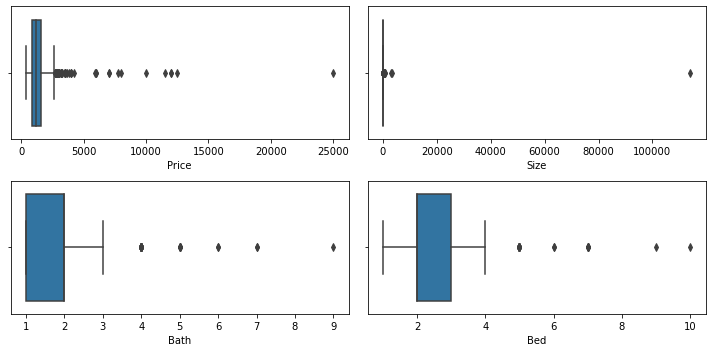

In [985]:
# Outlier Analysis
fig, axs = plt.subplots(2,2, figsize = (10,5))
plt1 = sns.boxplot(df1['Price'], ax = axs[0,0])
plt2 = sns.boxplot(df1['Size'], ax = axs[0,1])
plt1 = sns.boxplot(df1['Bath'], ax = axs[1,0])
plt2 = sns.boxplot(df1['Bed'], ax = axs[1,1])

plt.tight_layout()

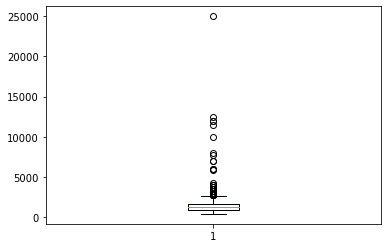

In [986]:
# outlier treatment for Price
plt.boxplot(df1.Price)
Q1 = df1.Price.quantile(0.25)
Q3 = df1.Price.quantile(0.75)
IQR = Q3 - Q1
df1 = df1[(df1.Price >= Q1 - 1.5*IQR) & (df1.Price <= Q3 + 1.5*IQR)]

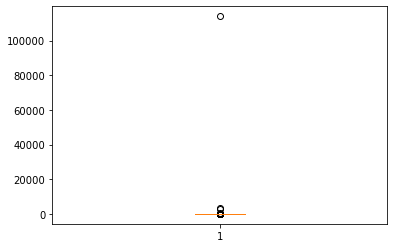

In [987]:
# outlier treatment for Size
plt.boxplot(df1.Size)
Q1 = df1.Size.quantile(0.25)
Q3 = df1.Size.quantile(0.75)
IQR = Q3 - Q1
df1 = df1[(df1.Size >= Q1 - 1.5*IQR) & (df1.Size <= Q3 + 1.5*IQR)]

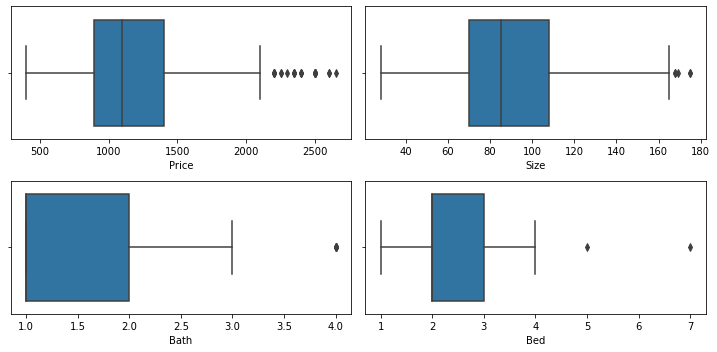

In [988]:
# Outlier Analysis
fig, axs = plt.subplots(2,2, figsize = (10,5))
plt1 = sns.boxplot(df1['Price'], ax = axs[0,0])
plt2 = sns.boxplot(df1['Size'], ax = axs[0,1])
plt1 = sns.boxplot(df1['Bath'], ax = axs[1,0])
plt2 = sns.boxplot(df1['Bed'], ax = axs[1,1])

plt.tight_layout()

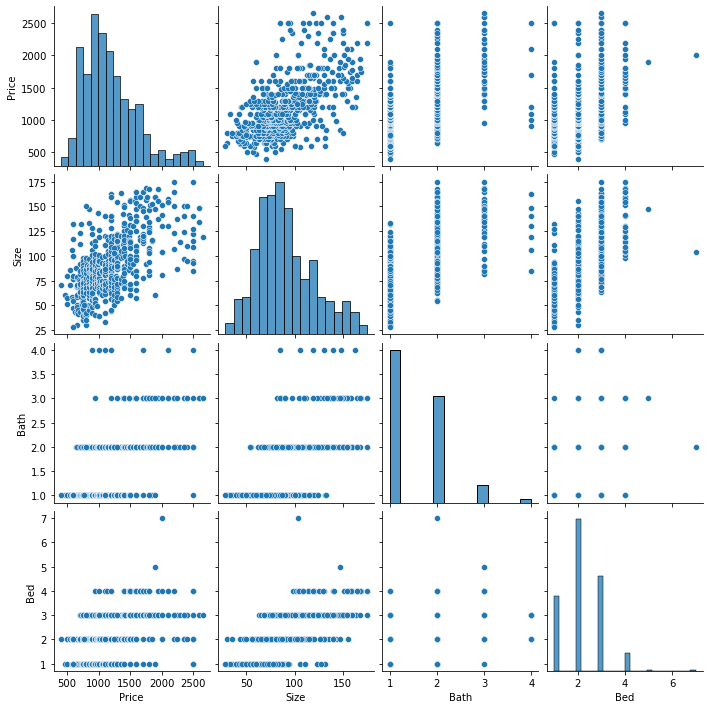

In [989]:
sns.pairplot(df1)
plt.show()

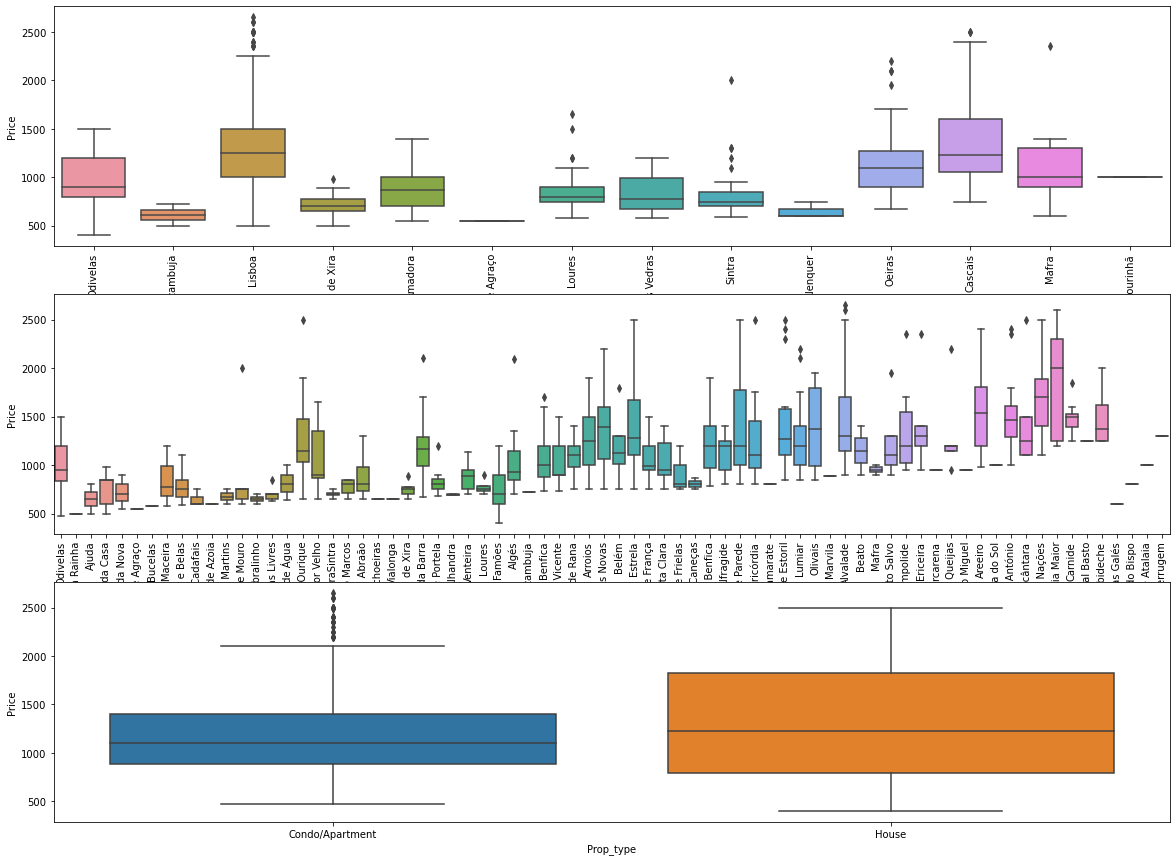

In [1090]:
plt.figure(figsize=(20, 15))

plt.subplot(3,1,1)
sns.boxplot(x = 'City', y = 'Price', data = df1)
plt.xticks(rotation='vertical')
plt.subplot(3,1,2)
sns.boxplot(x = 'Division', y = 'Price', data = df1)
plt.xticks(rotation='vertical')
plt.subplot(3,1,3)
sns.boxplot(x = 'Prop_type', y = 'Price', data = df1)
plt.show()

In [1091]:
# dropping prop_type
df1.drop('Prop_type',1, inplace=True) 

In [1143]:
df2 = df1.copy()
city_count = df1['City'].value_counts()
city_count.head(10)

Lisboa                 329
Cascais                 54
Oeiras                  47
Sintra                  34
Odivelas                32
Amadora                 28
Loures                  27
Vila Franca de Xira     17
Mafra                    9
Torres Vedras            3
Name: City, dtype: int64

In [1144]:
# categorize minor divisions as 'other'
minor_city = list(city_count[city_count <= 33].index)
df2['City'] = df2['City'].replace(minor_city, 'Other')
df2['City'].value_counts()

Lisboa     329
Other      123
Cascais     54
Oeiras      47
Sintra      34
Name: City, dtype: int64

<AxesSubplot:xlabel='City', ylabel='Price'>

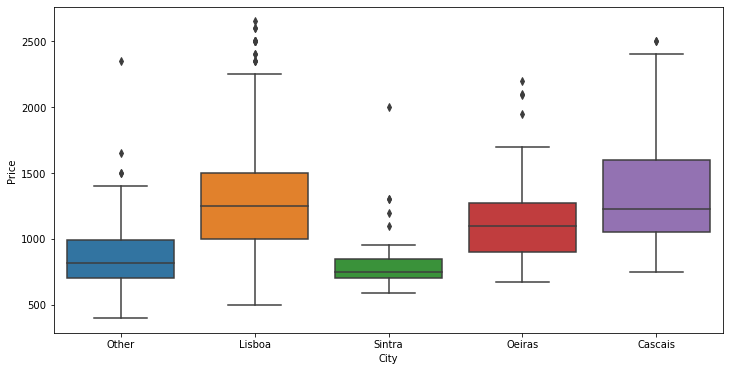

In [1145]:
plt.figure(figsize=(12, 6))
sns.boxplot(x = 'City', y = 'Price', data = df2)

In [1146]:
# creating dummy variables for Division
df2.drop('Division',1, inplace=True) # dropping Division column
df2 = pd.get_dummies(df2, drop_first = True)

In [1147]:
df2.head()

,Price,Size,Bath,Bed,City_Lisboa,City_Oeiras,City_Other,City_Sintra
0,470,60,1.0,1,0,0,1,0
2,500,57,1.0,2,0,0,1,0
3,500,51,1.0,1,1,0,0,0
5,500,80,1.0,2,0,0,1,0
6,550,70,1.0,2,0,0,1,0


In [1148]:
df2.describe()

,Price,Size,Bath,Bed,City_Lisboa,City_Oeiras,City_Other,City_Sintra
count,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000
mean,1189.735945,90.410562,1.540034,2.177172,0.560477,0.080068,0.209540,0.057922
std,431.642102,29.806717,0.665853,0.858181,0.496752,0.271630,0.407327,0.233794
min,400.000000,28.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,890.000000,70.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,1100.000000,85.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,1400.000000,108.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000
max,2650.000000,175.000000,4.000000,7.000000,1.000000,1.000000,1.000000,1.000000


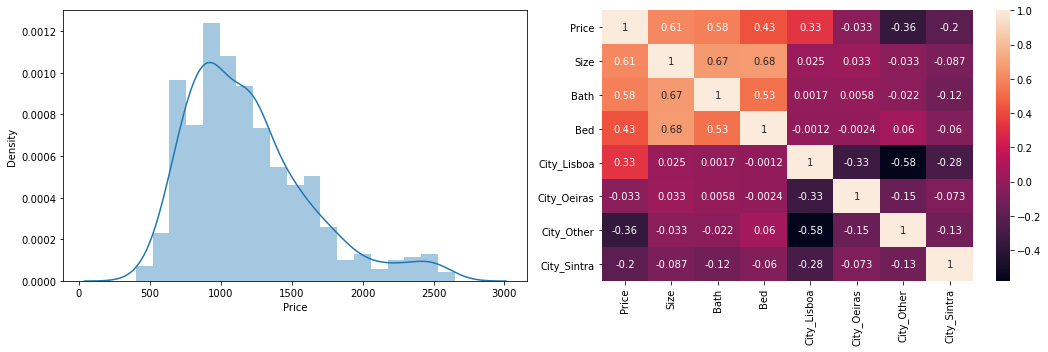

In [1149]:
# histogram and heat map
rent_corr = df2.corr()
fig, axs = plt.subplots(1,2, figsize=[15,5])
sns.distplot(df2['Price'], ax=axs[0])
sns.heatmap(rent_corr, ax=axs[1], annot=True)
fig.tight_layout()

In [1196]:
# Train/test split
X = df2.drop(columns = ['Price'])
y = df2['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

col = ['Size', 'Bath', 'Bed']
scaler = RobustScaler().fit(X_train[col])
X_train[col] = scaler.transform(X_train[col])

In [1197]:
X_train.head()

,Size,Bath,Bed,City_Lisboa,City_Oeiras,City_Other,City_Sintra
501,0.315789,1.0,1.0,1,0,0,0
486,-0.447368,0.0,0.0,1,0,0,0
406,0.447368,1.0,1.0,0,1,0,0
541,-0.184211,1.0,-1.0,1,0,0,0
402,0.842105,0.0,0.0,1,0,0,0


In [1198]:
scaler = RobustScaler().fit(X_test[col])
X_test[col] = scaler.transform(X_test[col])

In [1199]:
lm_scaled = LinearRegression()
lm_scaled.fit(X_train, y_train)

LinearRegression()

In [1200]:
cdf_scaled = pd.DataFrame(lm_scaled.coef_, index=X_train.columns, columns = ['coefficients'])
cdf_scaled

,coefficients
Size,214.226544
Bath,169.040152
Bed,28.341278
City_Lisboa,-8.727759
City_Oeiras,-203.614536
City_Other,-411.243153
City_Sintra,-355.094341


In [1201]:
# checking R2 for train/test
print(lm_scaled.score(X_train, y_train))
print(lm_scaled.score(X_test, y_test))

0.5835249202380657
0.6006570812926049


In [1202]:
y_pred = lm_scaled.predict(X_test)

In [1203]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 193.8688162560208
Mean Squared Error: 64401.8760495235
Root Mean Squared Error: 253.77524711745136


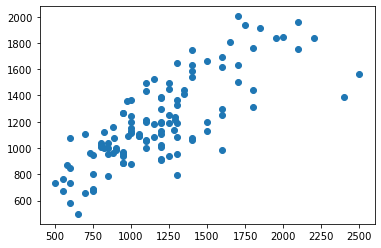

In [1204]:
# actual vs predicted
plt.scatter(y_test, y_pred)  

In [1205]:
# combining the predicted value with input
X_test['predicted_rent'] = y_pred
# prediction for all data
scaler = RobustScaler().fit(X[col])
X[col] = scaler.transform(X[col])
y_pred_all = lm_scaled.predict(X)
residuals_all = y - y_pred_all

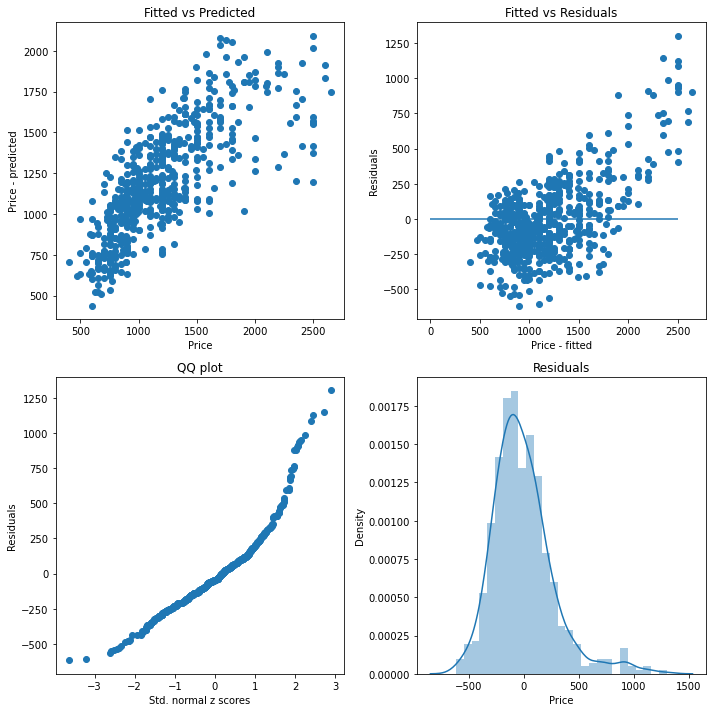

In [1206]:
# Evaluate model using charts for all data
fig, axs = plt.subplots(2,2, figsize=(10,10))

plt1 = axs[0][0].scatter(x=y, y=y_pred_all)
axs[0][0].set_title('Fitted vs Predicted')
axs[0][0].set_xlabel('Price')
axs[0][0].set_ylabel('Price - predicted')

plt2 = axs[0][1].scatter(x=y, y=residuals_all)
axs[0][1].hlines(0, xmin=0, xmax=2500)
axs[0][1].set_title('Fitted vs Residuals')
axs[0][1].set_xlabel('Price - fitted')
axs[0][1].set_ylabel('Residuals')

plt3 = axs[1][0].scatter(x=sorted(random.randn(len(residuals_all))), y=sorted(residuals_all))
axs[1][0].set_title('QQ plot')
axs[1][0].set_xlabel('Std. normal z scores')
axs[1][0].set_ylabel('Residuals')

plt4 = sns.distplot(residuals_all, ax=axs[1][1])
axs[1][1].set_title('Residuals')
plt.tight_layout()

In [1207]:
# Using statsmodels
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
pred = model.predict(X_train)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     92.27
Date:                Fri, 03 Jun 2022   Prob (F-statistic):           1.34e-83
Time:                        20:44:40   Log-Likelihood:                -3313.1
No. Observations:                 469   AIC:                             6642.
Df Residuals:                     461   BIC:                             6675.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1198.4372     50.129     23.907      0.000    1099.927    1296.947
Size          214.2265     26.347      8.131      0.000     162.452     266.001
Bath          169.0402     27.171      6.221      0.000     115.647     222.434
Bed            28.3413     20.790      1.363      0.173     -12.513      69.196
City_Lisboa    -8.7278     49.762     -0.175      0.861    -106.517      89.061
City_Oeiras  -203.6145     67.029     -3.038      0.003    -335.335     -71.894
City_Other   -411.2432     54.611     -7.530      0.000    -518.561    -303.926
City_Sintra  -355.0943     71.476     -4.968      0.000    -495.553    -214.636
==============================================================================
Omnibus:                      118.600   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              292.097
Skew:                           1.264   Prob(JB):                     3.73e-64
Kurtosis:                       5.925   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1208]:
# Regression Equation Formula
# Rent = 1156.77 + 206.16'size' + 158.27'bath' + 35.11'bed' +41.61'if in_lisbon' - 190.03 'if in Oeiras' - 351.46 'if in City other than Cascais'

In [1209]:
# model without zscoring

# Train/test split
X = df2.drop(columns = ['Price'])
y = df2['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [1210]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [1211]:
# checking R2 for train/test
print(lm.score(X_train, y_train))
print(lm.score(X_test, y_test))

0.5784258159174824
0.6092924670942104


In [1212]:
y_pred = lm.predict(X_test)

In [1213]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 187.25911000325445
Mean Squared Error: 64626.49766694314
Root Mean Squared Error: 254.2174220366164


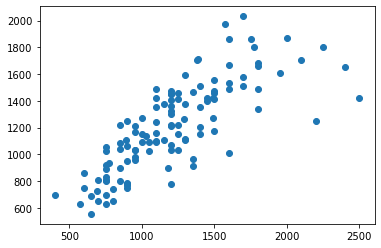

In [1214]:
# actual vs predicted
plt.scatter(y_test, y_pred)  

In [1215]:
# combining the predicted value with input
X_test['predicted_rent'] = y_pred
# prediction for all data
y_pred_all = lm.predict(X)
residuals_all = y - y_pred_all

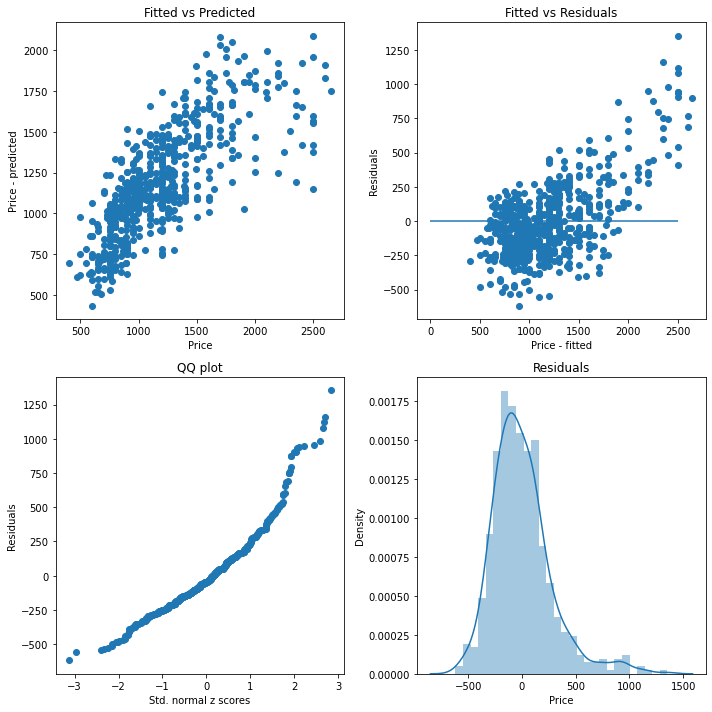

In [1216]:
# Evaluate model using charts for all data
fig, axs = plt.subplots(2,2, figsize=(10,10))

plt1 = axs[0][0].scatter(x=y, y=y_pred_all)
axs[0][0].set_title('Fitted vs Predicted')
axs[0][0].set_xlabel('Price')
axs[0][0].set_ylabel('Price - predicted')

plt2 = axs[0][1].scatter(x=y, y=residuals_all)
axs[0][1].hlines(0, xmin=0, xmax=2500)
axs[0][1].set_title('Fitted vs Residuals')
axs[0][1].set_xlabel('Price - fitted')
axs[0][1].set_ylabel('Residuals')

plt3 = axs[1][0].scatter(x=sorted(random.randn(len(residuals_all))), y=sorted(residuals_all))
axs[1][0].set_title('QQ plot')
axs[1][0].set_xlabel('Std. normal z scores')
axs[1][0].set_ylabel('Residuals')

plt4 = sns.distplot(residuals_all, ax=axs[1][1])
axs[1][1].set_title('Residuals')
plt.tight_layout()

In [1217]:
# Using statsmodels
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
pred = model.predict(X_train)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     90.36
Date:                Fri, 03 Jun 2022   Prob (F-statistic):           2.17e-82
Time:                        20:44:57   Log-Likelihood:                -3314.5
No. Observations:                 469   AIC:                             6645.
Df Residuals:                     461   BIC:                             6678.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         451.2415     60.986      7.399      0.000     331.396     571.087
Size            5.5098      0.681      8.092      0.000       4.172       6.848
Bath          169.3440     27.173      6.232      0.000     115.945     222.743
Bed            29.1164     20.839      1.397      0.163     -11.834      70.067
City_Lisboa    47.2381     47.100      1.003      0.316     -45.318     139.794
City_Oeiras  -191.3757     63.334     -3.022      0.003    -315.834     -66.917
City_Other   -369.6619     52.575     -7.031      0.000    -472.979    -266.345
City_Sintra  -315.5607     70.228     -4.493      0.000    -453.568    -177.553
==============================================================================
Omnibus:                      117.794   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              283.058
Skew:                           1.267   Prob(JB):                     3.43e-62
Kurtosis:                       5.840   Cond. No.                         769.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1218]:
# Regression Equation Formula
# Rent = 451.24 + 5.51'size' + 169.34'bath' + 29.12'bed' -47.24'if in_lisbon' - 191.38 'if in Oeiras' 
# - 315.56 'if in Sintra' - 369.66 'if in City other than Cascais'

In [1221]:
df_buy = pd.read_csv('lisbon_buy_6302_052922_final.csv')

In [1222]:
df_buy.head()

,Price,Prop_type,Size,Bath,Bed,City,Division
0,25000,House,80,1.0,3,Cadaval,Vilar
1,399900,House,250,2.0,5,Sintra,Almargem do Bispo
2,318000,House,123,4.0,4,Sintra,Almargem do Bispo
3,280000,House,101,1.0,2,Loures,Santa Iria de Azoia
4,425000,House,402,3.0,4,Alenquer,Carregado e Cadafais


In [1223]:
# dropping prop_type
df_buy.drop(['Prop_type', 'Division'],1, inplace=True) 

In [1224]:
city_count = df_buy['City'].value_counts()
city_count.head(10)

Lisboa                 2513
Sintra                  750
Cascais                 668
Oeiras                  459
Loures                  331
Amadora                 310
Vila Franca de Xira     259
Odivelas                250
Mafra                   190
Torres Vedras           175
Name: City, dtype: int64

In [1225]:
# categorize minor divisions as 'other'
minor_city = list(city_count[city_count <= 400].index)
df_buy['City'] = df_buy['City'].replace(minor_city, 'Other')
df_buy['City'].value_counts()

Lisboa     2513
Other      1889
Sintra      750
Cascais     668
Oeiras      459
Name: City, dtype: int64

In [1227]:
# creating dummy variables for Division
df_buy = pd.get_dummies(df_buy, drop_first = True)

In [1228]:
df_buy.head()

,Price,Size,Bath,Bed,City_Lisboa,City_Oeiras,City_Other,City_Sintra
0,25000,80,1.0,3,0,0,1,0
1,399900,250,2.0,5,0,0,0,1
2,318000,123,4.0,4,0,0,0,1
3,280000,101,1.0,2,0,0,1,0
4,425000,402,3.0,4,0,0,1,0


In [1231]:
df_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6279 entries, 0 to 6278
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        6279 non-null   int64  
 1   Size         6279 non-null   int64  
 2   Bath         6278 non-null   float64
 3   Bed          6279 non-null   int64  
 4   City_Lisboa  6279 non-null   uint8  
 5   City_Oeiras  6279 non-null   uint8  
 6   City_Other   6279 non-null   uint8  
 7   City_Sintra  6279 non-null   uint8  
dtypes: float64(1), int64(3), uint8(4)
memory usage: 220.9 KB


In [1237]:
# 1 null value in Bath column => remove
df_buy = df_buy.dropna(subset = ['Bath'])
df_buy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6278 entries, 0 to 6278
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        6278 non-null   int64  
 1   Size         6278 non-null   int64  
 2   Bath         6278 non-null   float64
 3   Bed          6278 non-null   int64  
 4   City_Lisboa  6278 non-null   uint8  
 5   City_Oeiras  6278 non-null   uint8  
 6   City_Other   6278 non-null   uint8  
 7   City_Sintra  6278 non-null   uint8  
dtypes: float64(1), int64(3), uint8(4)
memory usage: 269.8 KB


In [1238]:
X = df_buy.drop(columns = ['Price'])
df_buy['predicted_rent'] = lm.predict(X)

In [1239]:
df_buy.head() # rent value added

,Price,Size,Bath,Bed,City_Lisboa,City_Oeiras,City_Other,City_Sintra,predicted_rent
0,25000,80,1.0,3,0,0,1,0,779.056862
1,399900,250,2.0,5,0,0,0,1,1997.401104
2,318000,123,4.0,4,0,0,0,1,1607.228041
3,280000,101,1.0,2,0,0,1,0,865.646308
4,425000,402,3.0,4,0,0,1,0,2921.017294


In [1240]:
df_buy.to_csv(r'lisbon_buy_with_rent.csv', index = False, header=True)